# Pokémon Data Analysis Project  

**Author:** [Mayur Tetwar]  
**Date:** [19-3-2025]  
**Dataset:** `Pokemon.csv`  

## Description  
This project analyzes a **large dataset of Pokémon** to extract meaningful insights.  
It involves **data cleaning, exploration, visualization, and statistical analysis**.  
The dataset contains various attributes such as:  
- **Name**, **Type**, **HP**, **Attack**, **Defense**, **Speed**  
- Whether a Pokémon is **Legendary**  

## Goals  
### 🔹 Load and clean the dataset  
### 🔹 Perform exploratory data analysis (EDA)  
### 🔹 Identify trends and patterns in Pokémon attributes  
### 🔹 Visualize distributions and relationships between attributes  
### 🔹 Apply machine learning models (if applicable)  

## Libraries Used  
- `pandas` → for data manipulation  
- `numpy` → for numerical computations  
- `matplotlib` & `seaborn` → for data visualization  
- `scikit-learn` → for ML models 


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df=pd.read_csv("Pokemon.csv")
df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


In [74]:
df.drop(df[df['type1']=='Blastoise'].index,inplace=True)

In [76]:
df['type1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying', 'Graass'],
      dtype=object)

In [46]:
list=df.index[df['legendary']].tolist()   ## All eniries with if 'lengrndary' is true and get all index into list
list

[194,
 195,
 196,
 197,
 198,
 199,
 203,
 204,
 205,
 206,
 305,
 306,
 307,
 312,
 313,
 314,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 582,
 583,
 584,
 585,
 586,
 587,
 588,
 589,
 590,
 591,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 844,
 845,
 846,
 847,
 848,
 849,
 850,
 851,
 852,
 853,
 924,
 925,
 926,
 927,
 928,
 929,
 930,
 931,
 939,
 940,
 941,
 942,
 943,
 944,
 949,
 950,
 951,
 952,
 1052,
 1053,
 1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1063,
 1064,
 1065,
 1066,
 1067,
 1068,
 1069,
 1070,
 1071]

In [6]:
print(f'Number of Rows is {df.shape[0]} and colmuns is {df.shape[1]}')

Number of Rows is 1072 and colmuns is 13


In [7]:
# Remove unwannted info like total, sp_attack and sp_defense
del df['total']
df.drop(['sp_attack','sp_defense'],inplace=True,axis=1)

In [8]:
df.head(10)

,number,name,type1,type2,hp,attack,defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,80,1,False
3,3,Mega Venusaur,Grass,Poison,80,100,123,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,80,82,83,80,1,False
5,4,Charmander,Fire,NaN,39,52,43,65,1,False
6,5,Charmeleon,Fire,NaN,58,64,58,80,1,False
7,6,Charizard,Fire,Flying,78,84,78,100,1,False
8,6,Mega Charizard X,Fire,Dragon,78,130,111,100,1,False
9,6,Mega Charizard Y,Fire,Flying,78,104,78,100,1,False


In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imputer=SimpleImputer(strategy='constant',fill_value="")
df2=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df2

,number,name,type1,type2,hp,attack,defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,80,1,False
3,3,Mega Venusaur,Grass,Poison,80,100,123,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,80,82,83,80,1,False
...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,,100,145,130,30,8,True
1068,897,Spectrier,Ghost,,100,65,60,130,8,True
1069,898,Calyrex,Psychic,Grass,100,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,100,165,150,50,8,True


In [11]:
Type1=df2['type1'].unique()
Type1

array(['Grass', 'Fire', 'Water', 'Blastoise', 'Bug', 'Normal', 'Dark',
       'Poison', 'Electric', 'Ground', 'Ice', 'Fairy', 'Steel',
       'Fighting', 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying',
       'Graass'], dtype=object)

In [12]:
df3=df2.groupby(['type1','name'])[['hp','attack','speed']].sum()
df3=df3.reset_index()
df3

,type1,name,hp,attack,speed
0,Blastoise,Gigantamax Blasoise,79,83,78
1,Bug,Accelgor,80,70,145
2,Bug,Ariados,70,90,40
3,Bug,Beautifly,60,70,65
4,Bug,Beedrill,65,90,75
...,...,...,...,...,...
1067,Water,Whiscash,110,78,60
1068,Water,Wingull,40,30,85
1069,Water,Wishiwashi School Forme,45,140,30
1070,Water,Wishiwashi Solo Forme,45,20,40


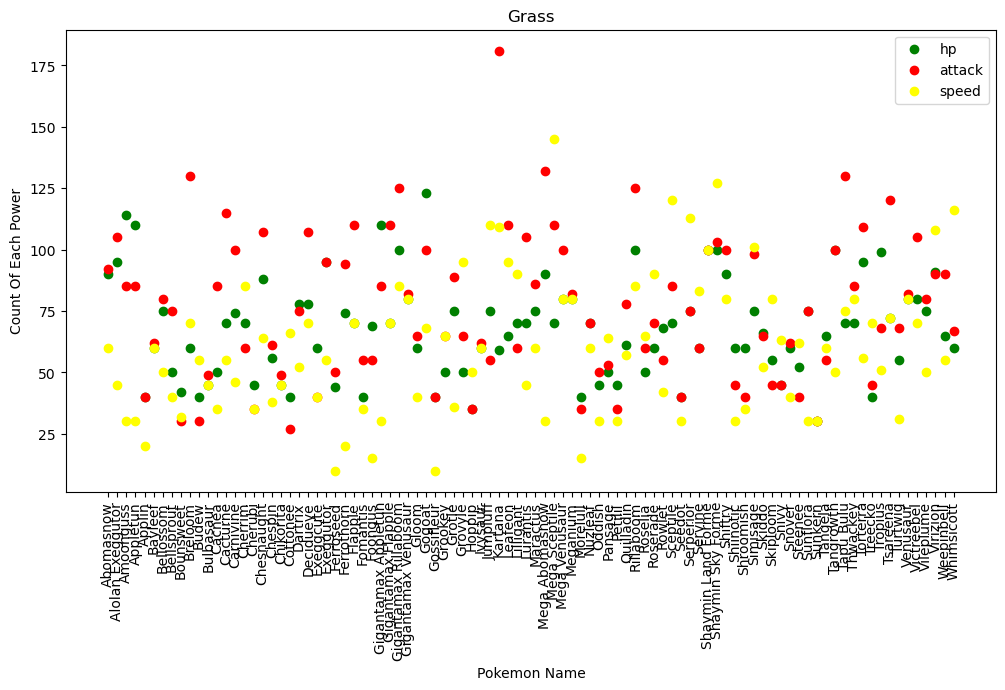

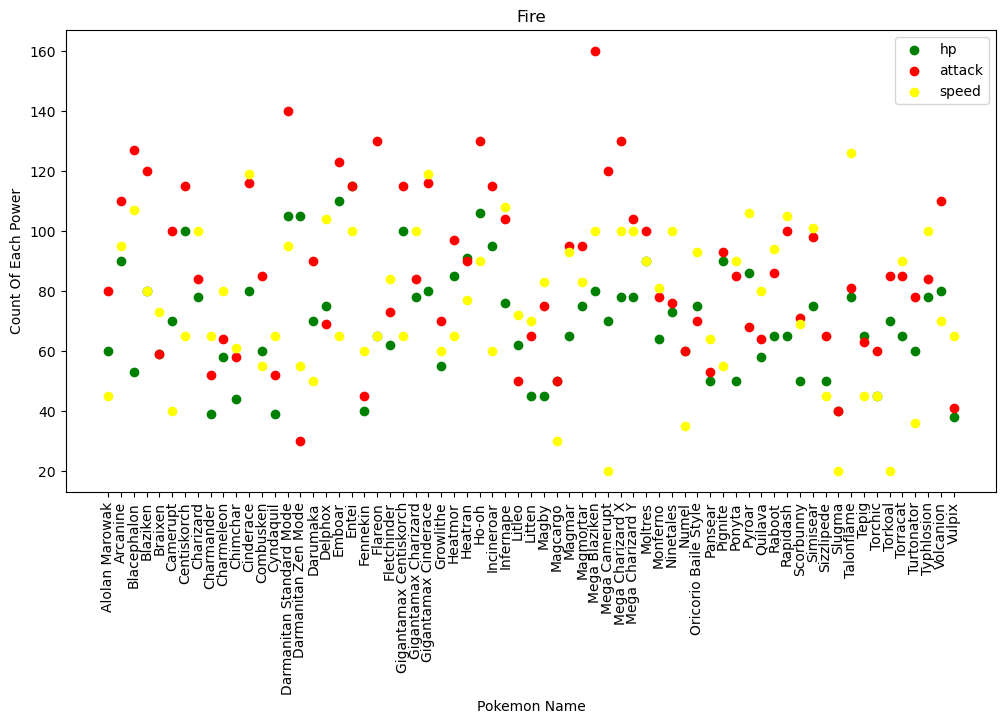

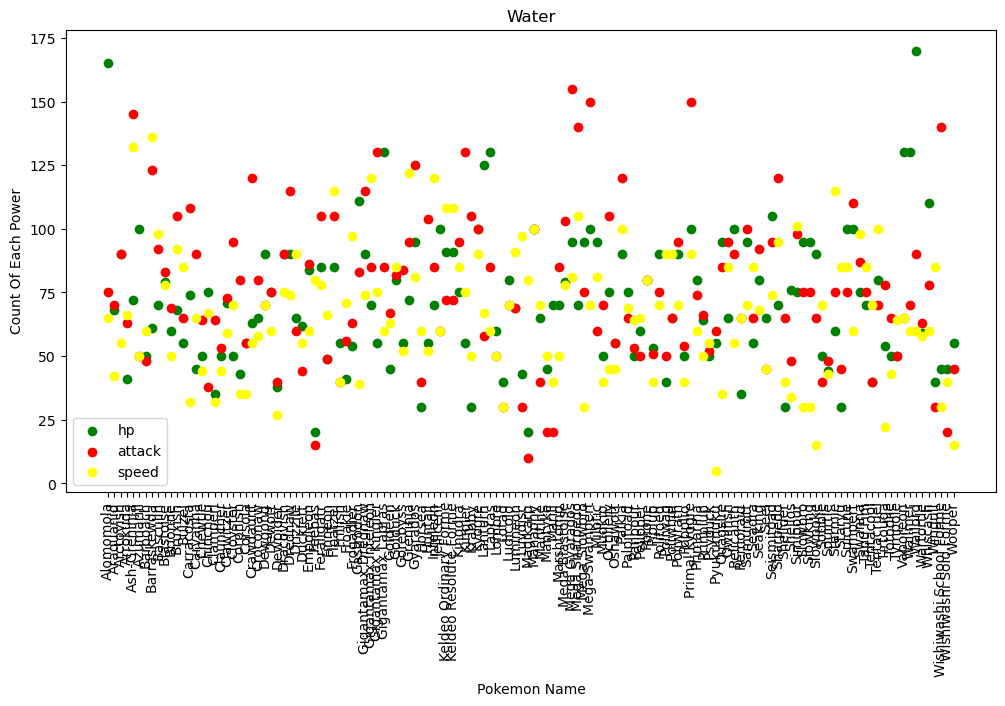

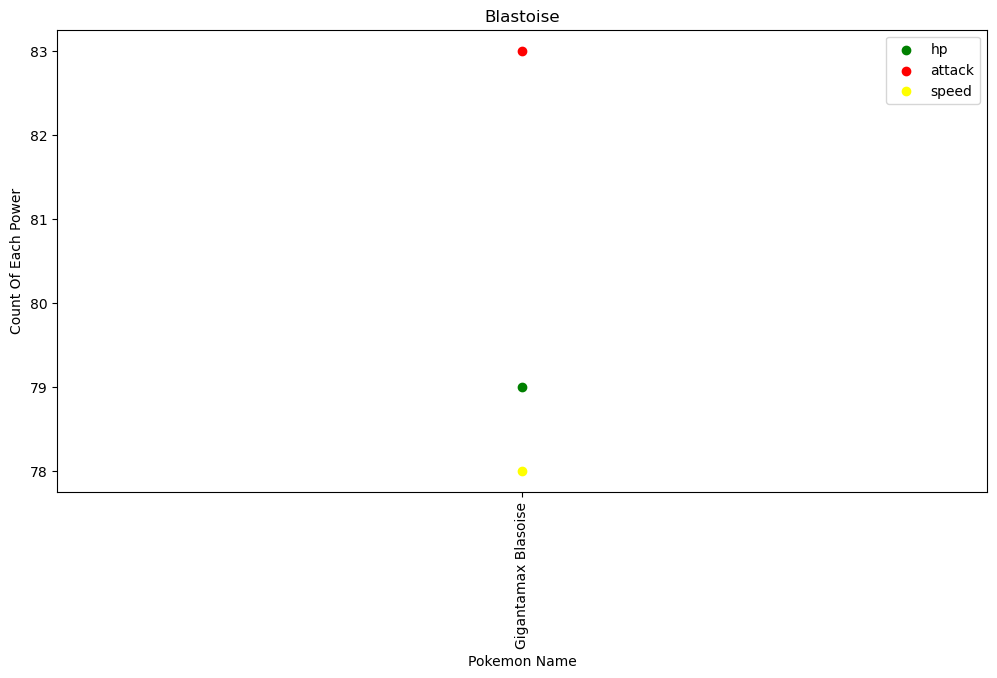

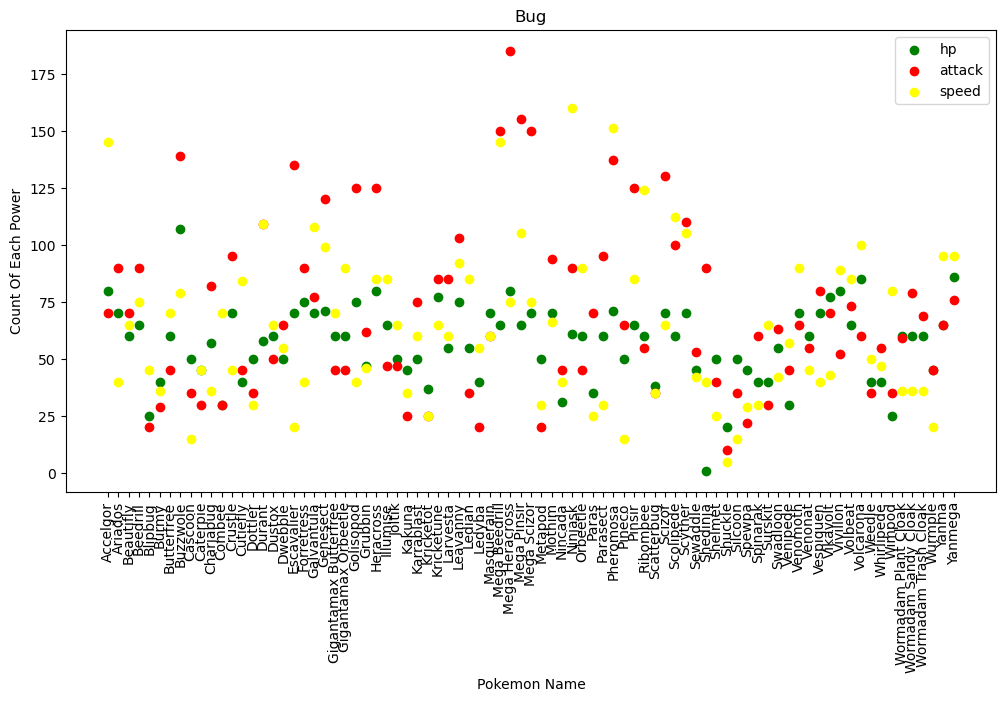

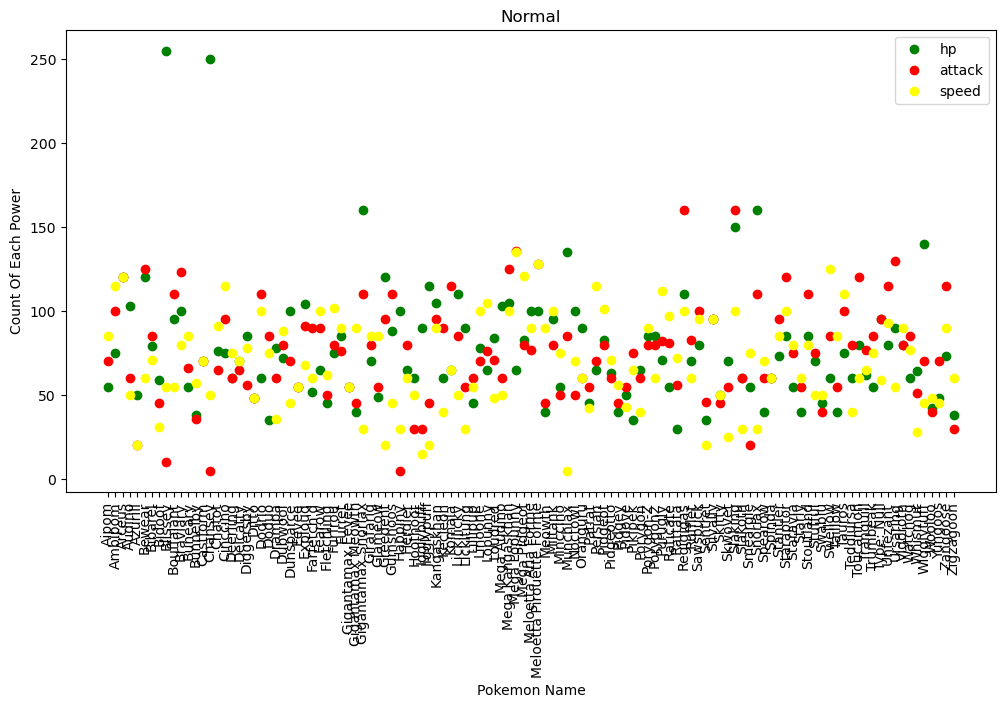

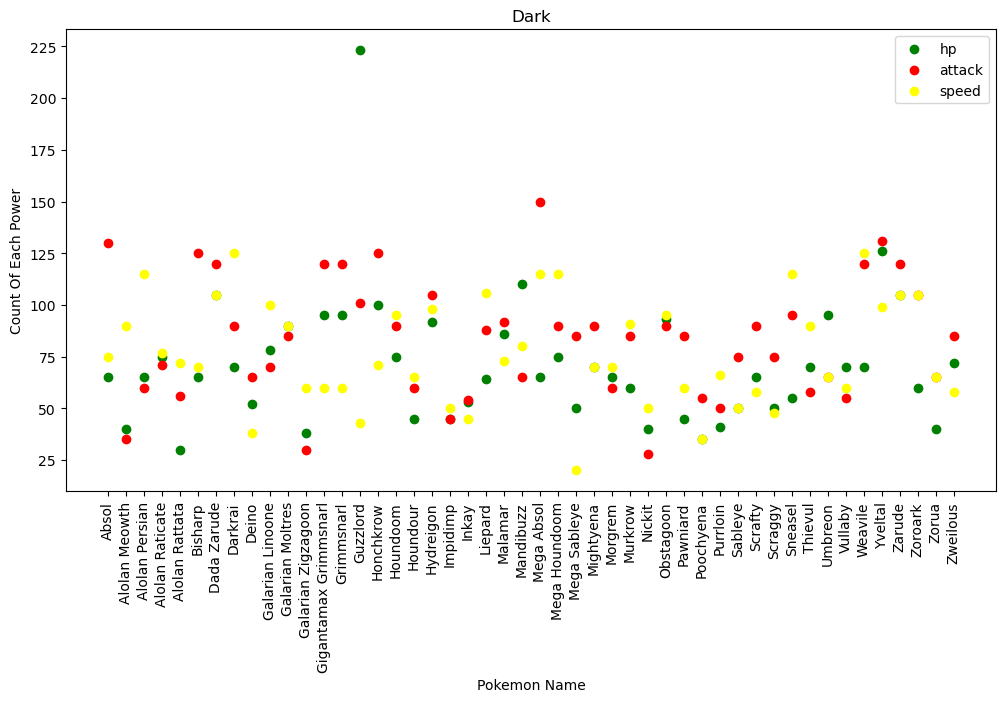

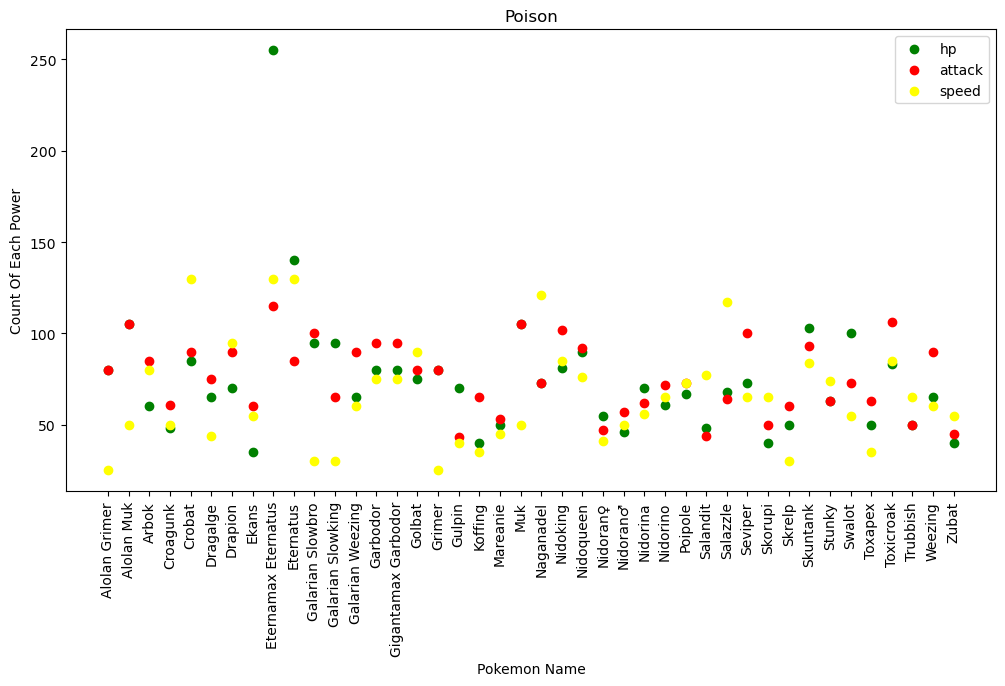

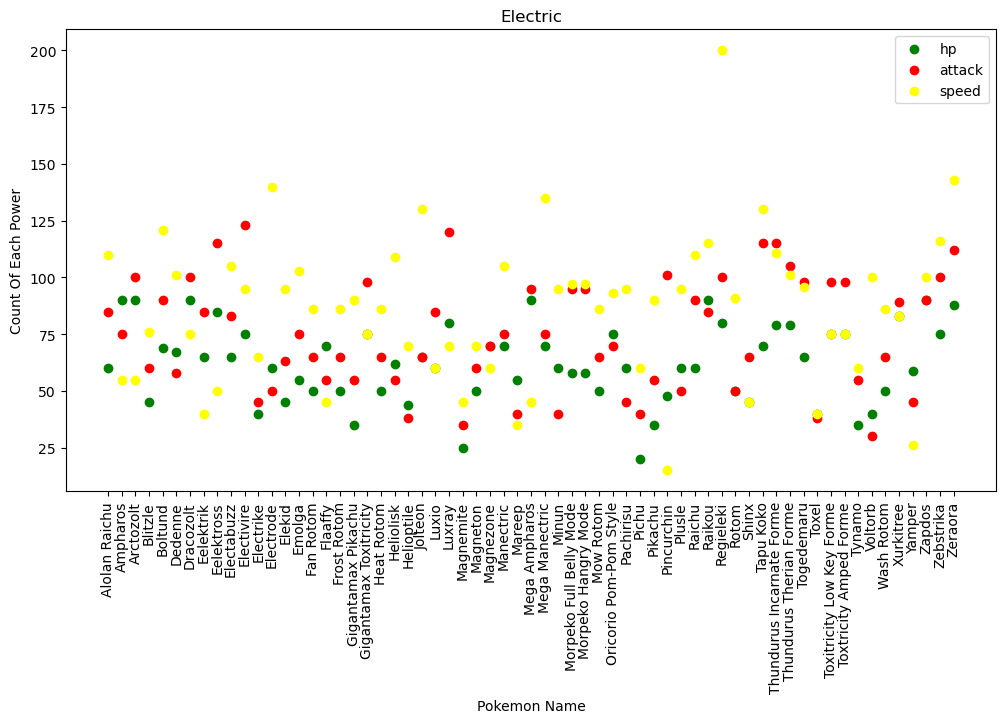

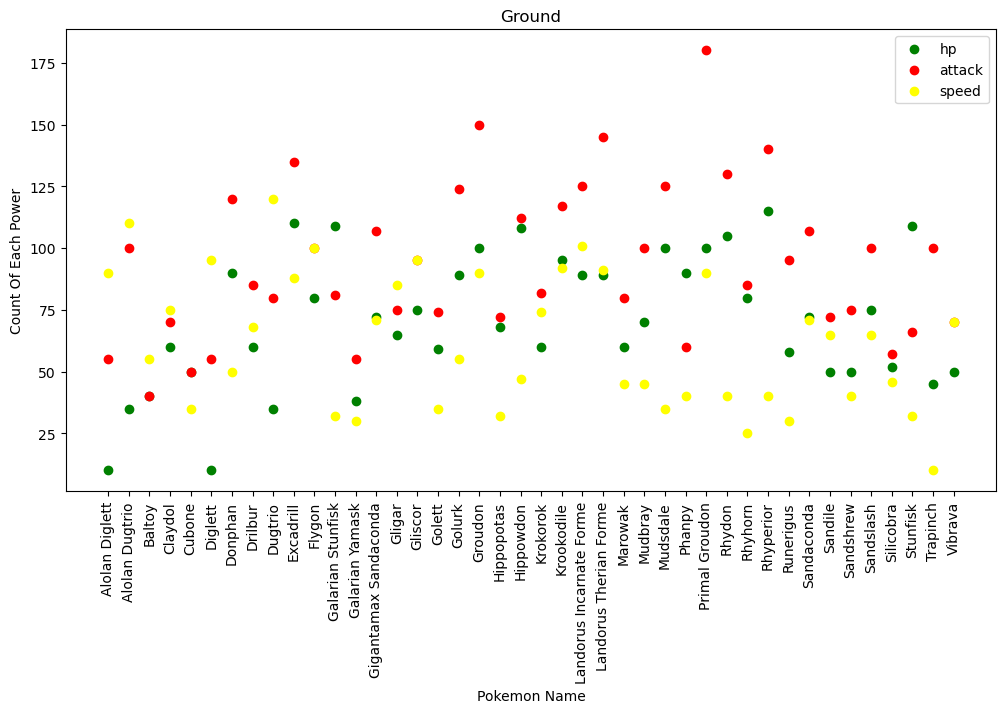

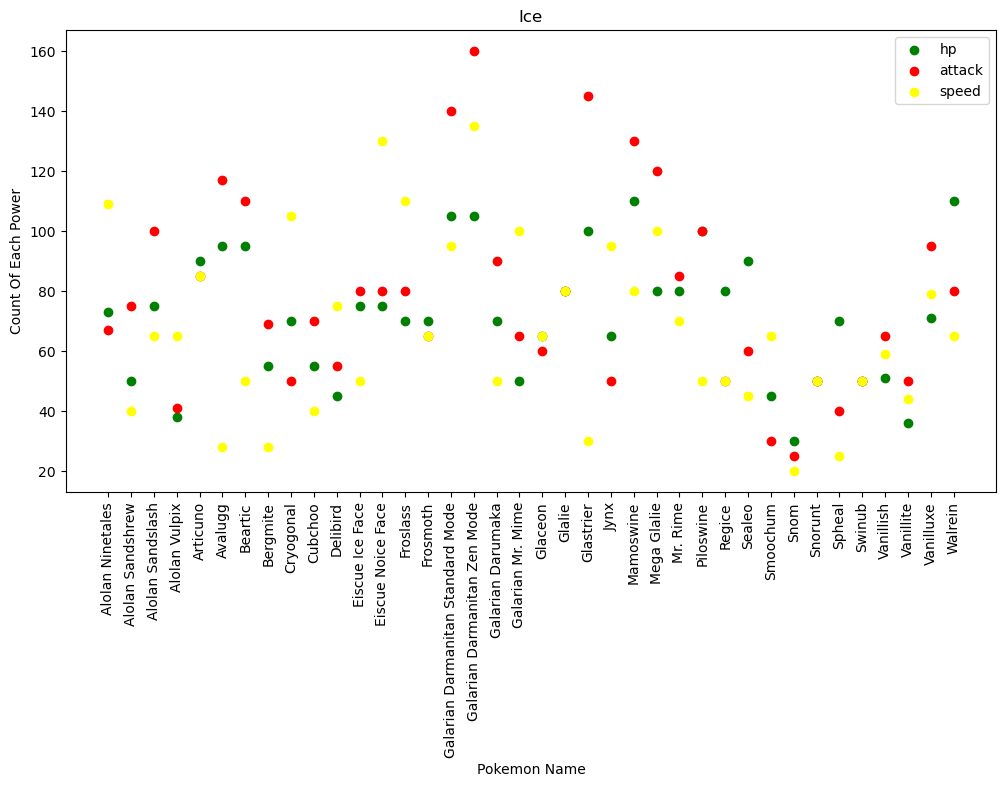

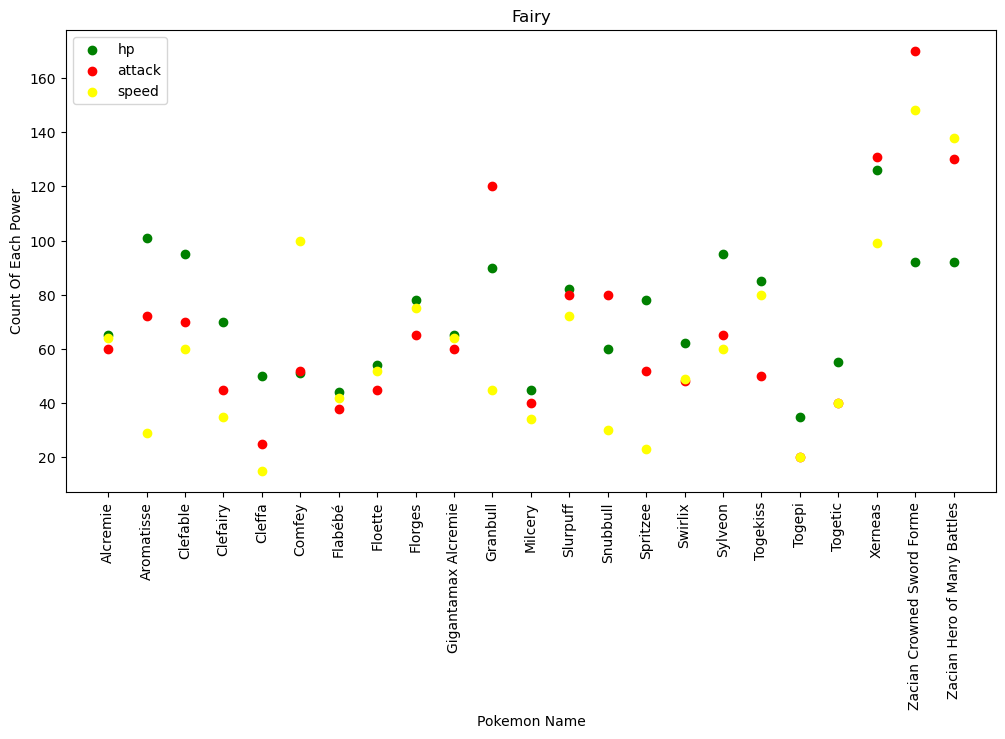

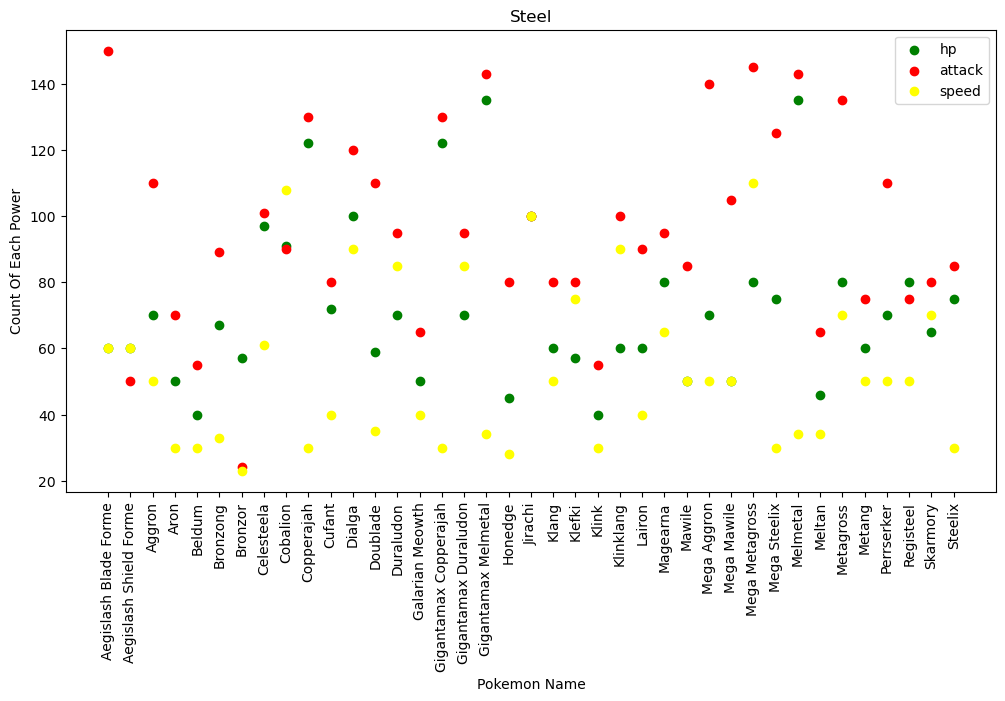

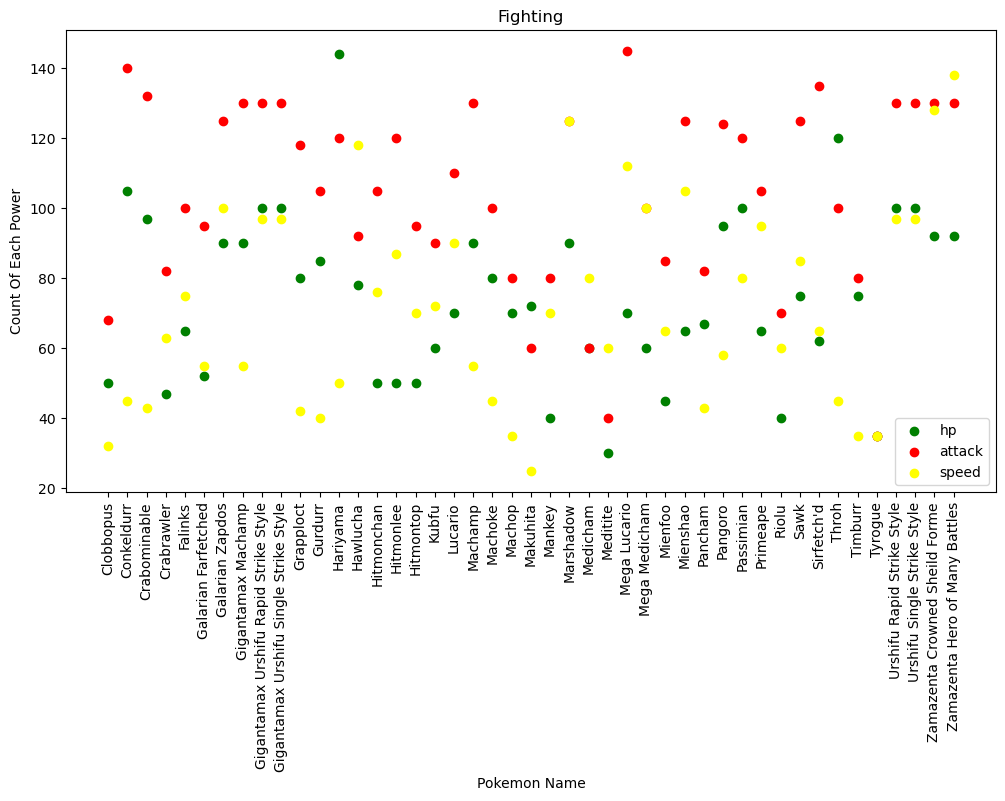

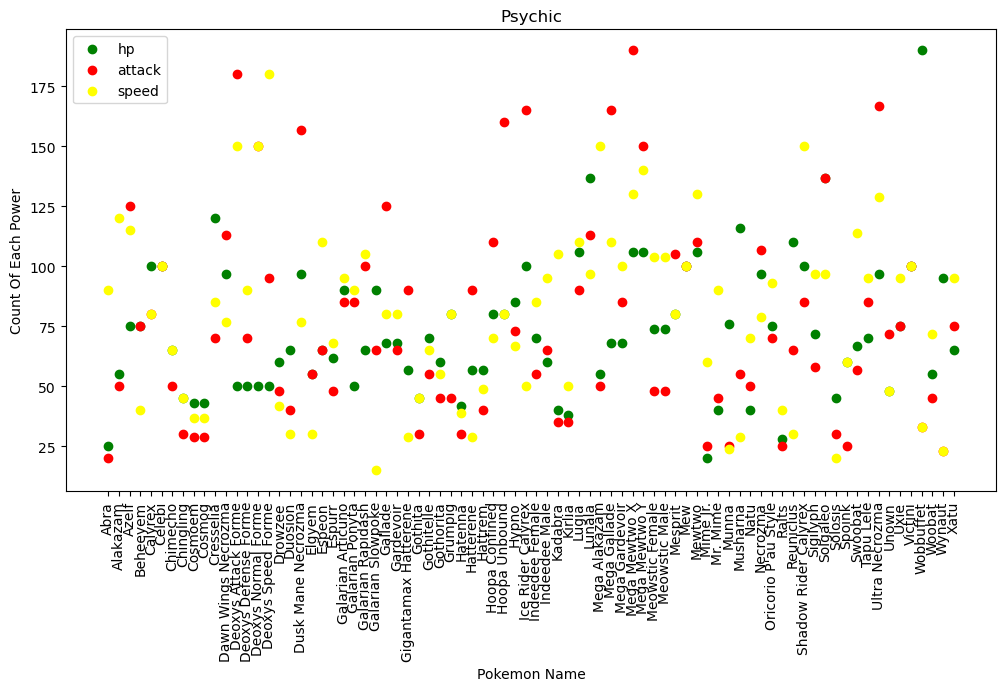

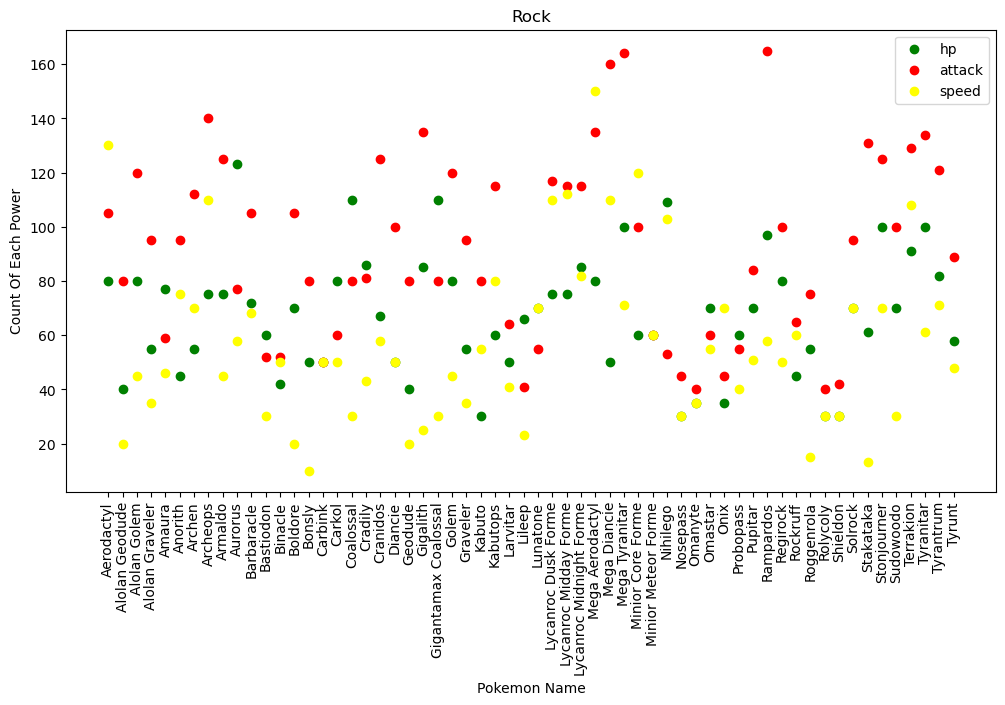

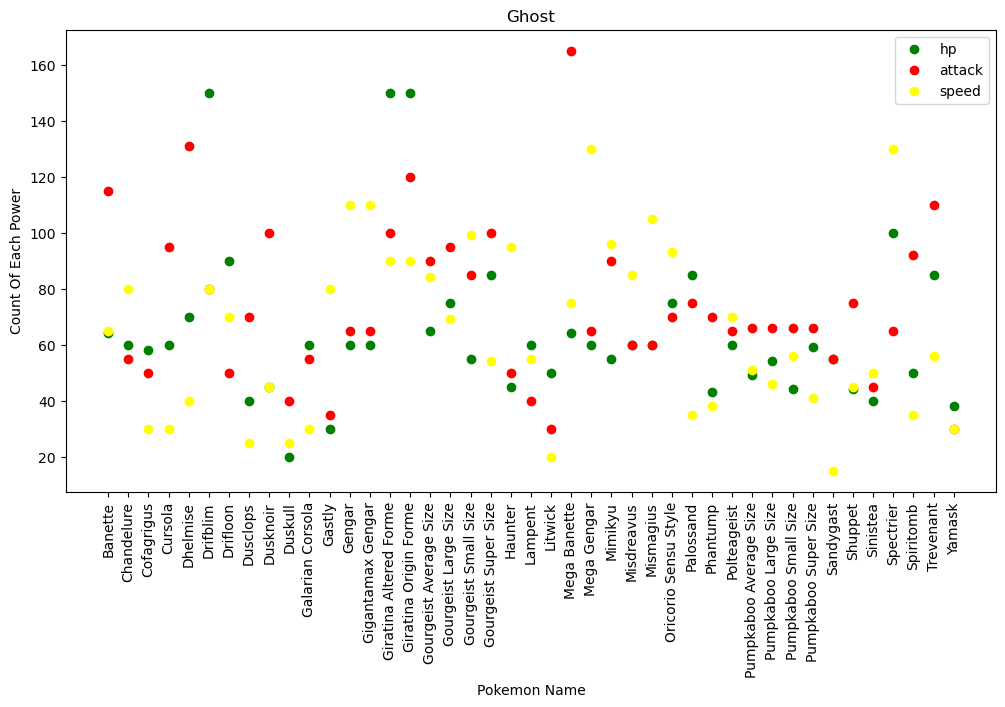

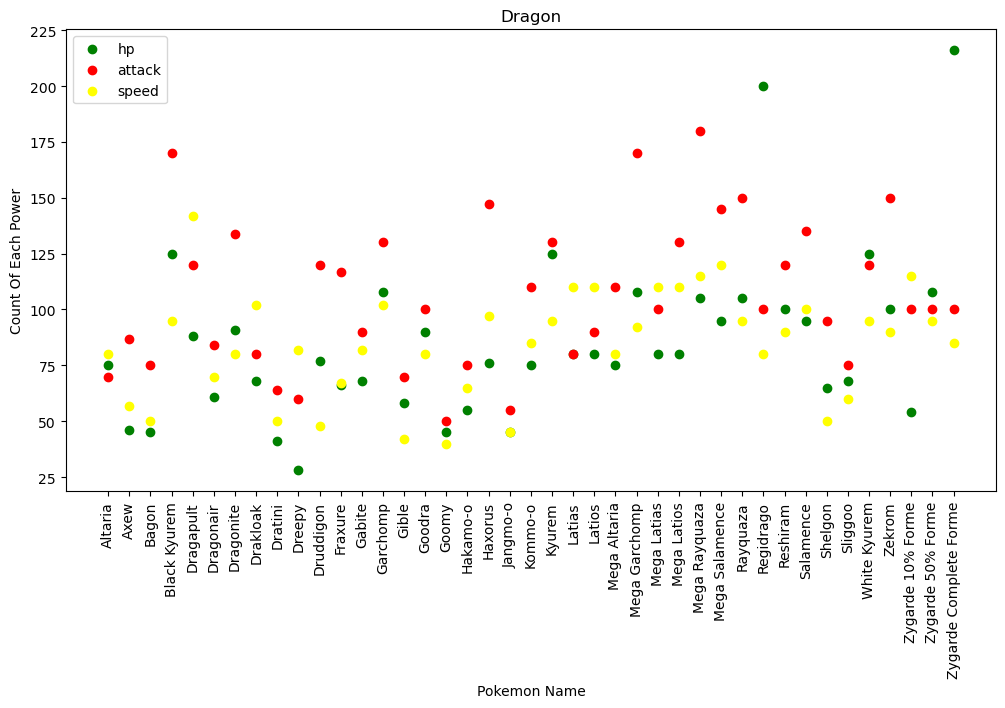

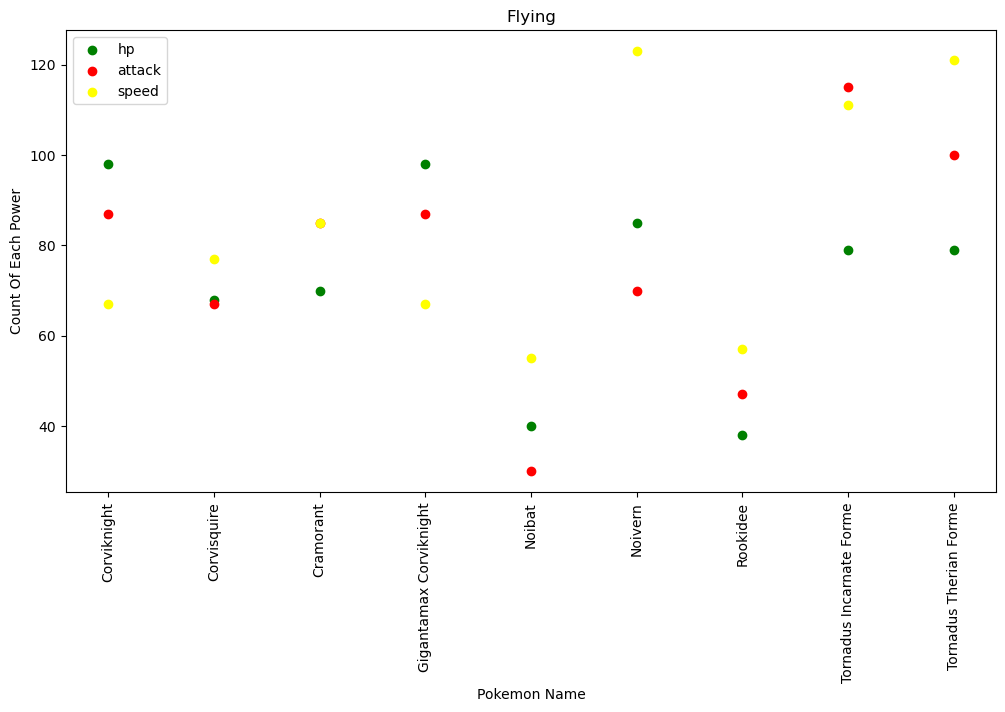

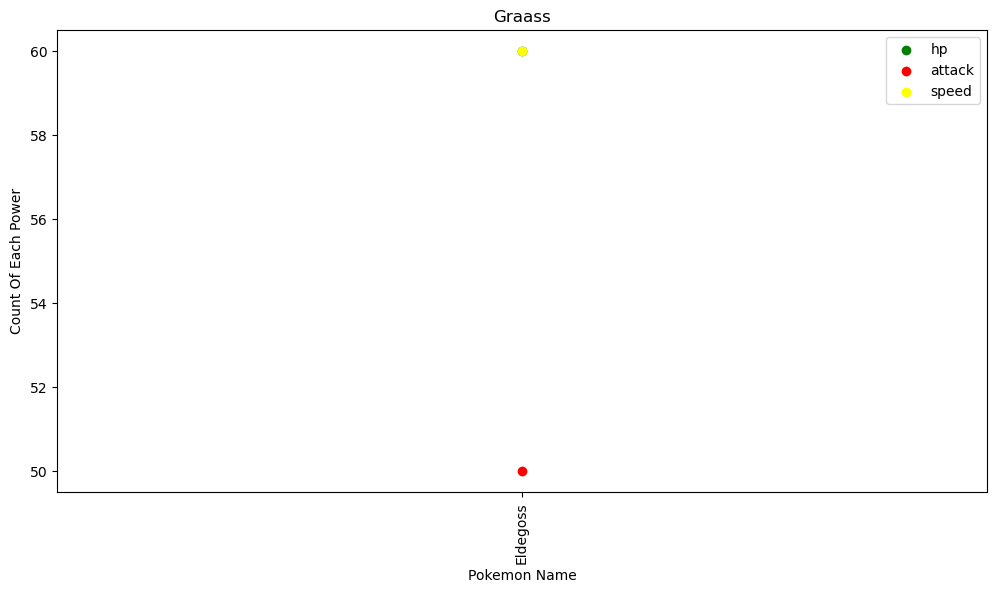

In [13]:
for etype in Type1:
    data=df3[df3['type1']==etype].reset_index();
    plt.figure(figsize=(12,6))
    plt.scatter(data['name'],data['hp'],color='green',label='hp')
    plt.scatter(data['name'],data['attack'],color='red',label='attack')
    plt.scatter(data['name'],data['speed'],color='yellow',label='speed')
    plt.title(etype);
    plt.xticks(rotation=90)
    plt.xlabel('Pokemon Name')
    plt.ylabel('Count Of Each Power')
    plt.legend()
    plt.show()

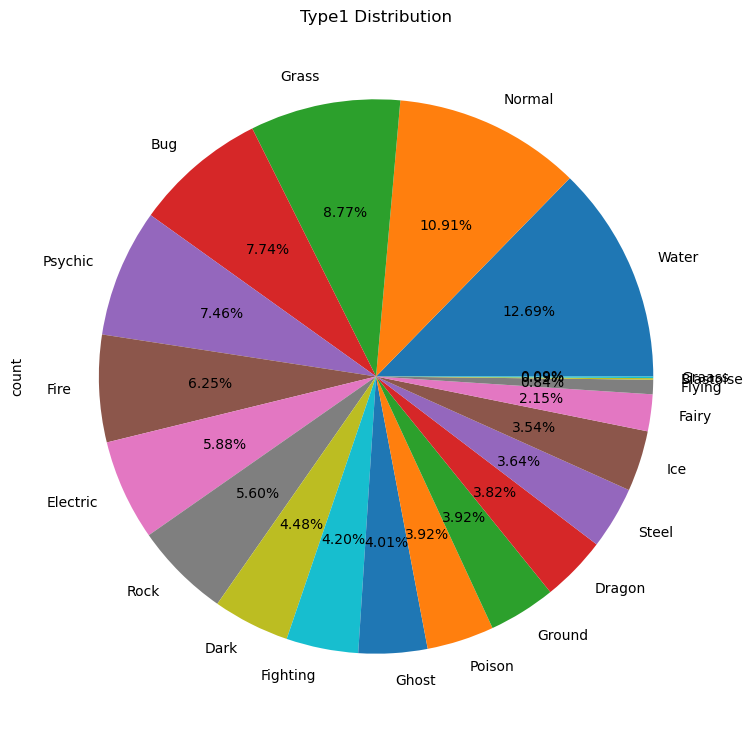

In [14]:
plt.figure(figsize=(14,9))
df["type1"].value_counts().plot.pie(autopct="%1.2f%%", title="Type1 Distribution")
plt.show()

In [15]:
typeCount=df2['type1'].value_counts()

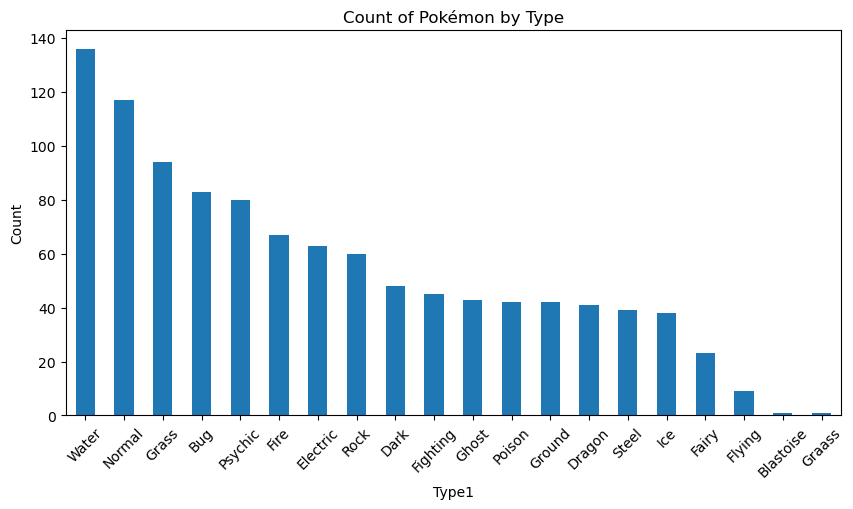

In [16]:
typeCount.plot(kind='bar', figsize=(10, 5))
plt.title("Count of Pokémon by Type")
plt.xlabel("Type1")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

        type1 attack
0   Blastoise     83
1         Bug   5837
2        Dark   4009
3      Dragon   4388
4    Electric   4722
5       Fairy   1558
6    Fighting   4713
7        Fire   5796
8      Flying    688
9       Ghost   3172
10     Graass     50
11      Grass   7160
12     Ground   3946
13        Ice   2964
14     Normal   8790
15     Poison   3196
16    Psychic   6115
17       Rock   5522
18      Steel   3755
19      Water  10302


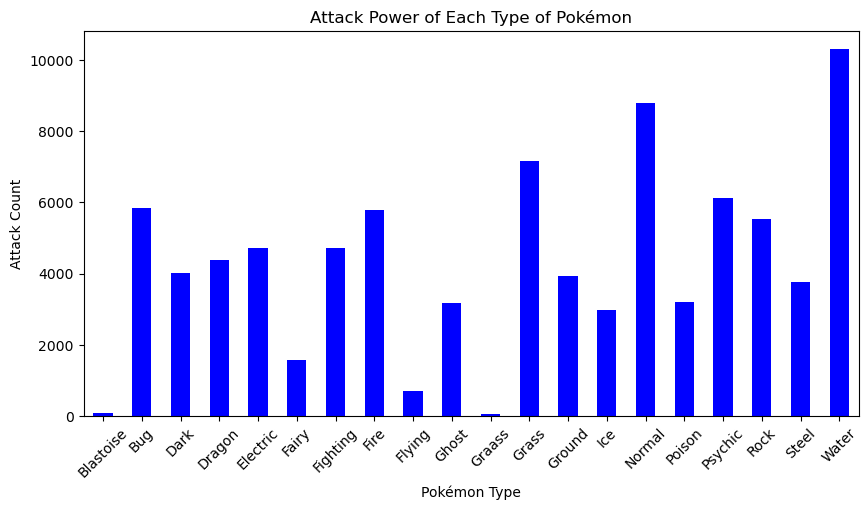

In [17]:
# df2.drop(df2[df2['hp']=='Water'].index,inplace=True)
# df2.drop(df2[df2['type1']=='Blastoise'].index,inplace=True)
# df2.drop(df2[df2['type1']=='Graass'].index,inplace=True)
df5=df2.groupby(['type1'])[['attack']].sum()
df5=df5.reset_index()
print(df5)
df5.plot(x='type1', y="attack", kind="bar", legend=False, color="blue", figsize=(10, 5))
plt.title("Attack Power of Each Type of Pokémon")
plt.ylabel("Attack Count")
plt.xlabel("Pokémon Type")
plt.xticks(rotation=45)
plt.show()